<a href="https://colab.research.google.com/github/thanadolch/KKU_data_mining/blob/master/Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
path = '/content/drive/My Drive/DWDM_matrerial'

In [93]:
import os

In [94]:
RM = os.path.join(path,'Recommendation System.csv')

In [95]:
RM_Table = pd.read_csv(RM)

1.ขั้นตอนการเตรียมข้อมูล


In [96]:
RM_Table 

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116
...,...,...,...,...
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156


In [97]:
RM_Table .columns = (['user_id','item_id',"rating","timestamp"])

In [98]:
RM_Table.head()

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [99]:
Movie = os.path.join(path,'Movie_Id_Titles')

In [100]:
Movie_Table = pd.read_csv(Movie)
Movie_Table

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [101]:
df = pd.merge(RM_Table,Movie_Table,on='item_id')
df

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"
...,...,...,...,...,...
99997,840,1674,4,891211682,Mamma Roma (1962)
99998,655,1640,3,888474646,"Eighth Day, The (1996)"
99999,655,1637,3,888984255,Girls Town (1996)
100000,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [102]:
df.sort_values('item_id').head()

,user_id,item_id,rating,timestamp,title
3937,308,1,4,887736532,Toy Story (1995)
4247,893,1,5,874827725,Toy Story (1995)
4246,336,1,3,877759342,Toy Story (1995)
4245,303,1,5,879466966,Toy Story (1995)
4244,886,1,4,876031433,Toy Story (1995)


In [103]:
df.isnull().any()

user_id      False
item_id      False
rating       False
timestamp    False
title        False
dtype: bool

1.1 วิเคราะห์โดยการassociation

In [104]:
!pip install apyori

In [105]:
from apyori import apriori

In [106]:
asso = df.groupby('user_id')['title'].apply(list)
list(apriori(asso,min_support=0.3,min_confidence=0.99))

[RelationRecord(items=frozenset({'Return of the Jedi (1983)', 'Star Wars (1977)', 'Empire Strikes Back, The (1980)'}), support=0.3336864406779661, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9936908517350158, lift=1.6089951355709349)]),
 RelationRecord(items=frozenset({'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)', 'Star Wars (1977)'}), support=0.3114406779661017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9966101694915255, lift=1.6137221269296742)])]

2.ปรับแก้เพิ่มเติม

In [107]:
Movie1 = os.path.join(path,'movies.csv')
Movie1 = pd.read_csv(Movie1)
Movie1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34179,151697,Grand Slam (1967),Thriller
34180,151701,Bloodmoney (2010),(no genres listed)
34181,151703,The Butterfly Circus (2009),Drama
34182,151709,Zero (2015),Drama|Sci-Fi


In [108]:
hj = pd.merge(Movie1,df,on='title')
hj

,movieId,title,genres,user_id,item_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,308,1,4,887736532
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,287,1,5,875334088
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,148,1,4,877019411
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,280,1,4,891700426
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,66,1,3,883601324
...,...,...,...,...,...,...,...
88923,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,429,587,3,882386895
88924,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,551,587,4,892783525
88925,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,94,587,4,891721078
88926,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,896,587,3,887159603


In [109]:
poi = hj[['user_id','item_id','rating','timestamp','title','genres']]
poi

,user_id,item_id,rating,timestamp,title,genres
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
88923,429,587,3,882386895,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88924,551,587,4,892783525,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88925,94,587,4,891721078,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88926,896,587,3,887159603,"Hour of the Pig, The (1993)",Crime|Drama|Mystery


In [110]:
df['genres'] = df['title'].map(Movie1.set_index('title')['genres'])
df

,user_id,item_id,rating,timestamp,title,genres
0,0,172,5,881250949,"Empire Strikes Back, The (1980)",NaN
1,213,172,5,878955442,"Empire Strikes Back, The (1980)",NaN
2,92,172,4,875653271,"Empire Strikes Back, The (1980)",NaN
3,77,172,3,884752562,"Empire Strikes Back, The (1980)",NaN
4,194,172,3,879521474,"Empire Strikes Back, The (1980)",NaN
...,...,...,...,...,...,...
99997,840,1674,4,891211682,Mamma Roma (1962),Drama
99998,655,1640,3,888474646,"Eighth Day, The (1996)",NaN
99999,655,1637,3,888984255,Girls Town (1996),Comedy|Drama
100000,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",NaN


In [111]:
E = df[df['title']=='Empire Strikes Back, The (1980)']

In [112]:
io = E.fillna('action sci fi')

In [113]:
st = df[df['title']=='Star Wars (1977)']
st = st.fillna('action sci fi')

In [114]:
Mo = df[df['title']=='Monty Python and the Holy Grail (1974)']
Mo = Mo.fillna('Adventure, Comedy, Fantasy')

In [115]:
Mrs = df[df['title']=='Mrs. Brown (Her Majesty, Mrs. Brown) (1997)']
Mrs = Mrs.fillna('Biography, Drama, History')

In [116]:
Pro = df[df['title']=='Professional, The (1994)']
Pro = Pro.fillna('Action, Crime, Drama')

In [117]:
Ind = df[df['title']=='Independence Day (ID4) (1996)']
Ind = Ind.fillna('Action, Adventure, Sci-Fi')

In [118]:
Bea = df[df['title']=='Beavis and Butt-head Do America (1996)']
Bea = Bea.fillna('Animation, Adventure, Comedy')

In [119]:
Red = df[df['title']=='Red Firecracker, Green Firecracker (1994)']
Red = Red.fillna('Life,romance')

In [120]:
Ko = df[df['title']=='Kolya (1996)']
Ko = Ko.fillna('Comedy, Drama, Music')

In [121]:
He = df[df['title']=='Heavyweights (1994)']
He = He.fillna('Comedy,Drama,Family')

In [122]:
Dr = df[df['title']=='Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)']
Dr = Dr.fillna('Science Fiction, Drama, Comedy, Action')

In [123]:
Men = df[df['title']=='Men in Black (1997)']
Men = Men.fillna('Action, Adventure, Comedy')

In [124]:
Evil = df[df['title']=='Evil Dead II (1987)']
Evil = Evil.fillna('Action, Comedy, Fantasy')

In [125]:
Ret = df[df['title']=='Return of the Jedi (1983)']
Ret = Ret.fillna('Action, Adventure, Fantasy')

In [126]:
Con = df[df['title']=='Conan the Barbarian (1981)']
Con = Con.fillna('Action, Adventure, Fantasy')

In [127]:
Boot = df[df['title']=='Boot, Das (1981)']
Boot = Boot.fillna('Adventure, Drama, Thriller')

In [128]:
City = df[df['title']=='City of Lost Children, The (1995)']
City = City.fillna('Adventure, Drama, Thriller')

In [129]:
Win = df[df['title']=='Wings of Desire (1987)']
Win = Win.fillna('Fantasy,Romance')

In [130]:
Rai = df[df['title']=='Raiders of the Lost Ark (1981)']
Rai = Rai.fillna('Action, Adventure')

In [131]:
Will = df[df['title']=='Willy Wonka and the Chocolate Factory (1971)']
Will = Will.fillna('Family, Fantasy, Musical')

In [132]:
Tales = df[df['title']=='Tales From the Crypt Presents: Demon Knight (1995)']
Tales = Tales.fillna('Action, Fantasy, Horror')

In [133]:
Postino = df[df['title']=='Postino, Il (1994)']
Postino = Postino.fillna('Biography, Comedy, Drama')

In [134]:
Close = df[df['title']=='Close Shave, A (1995)']
Close = Close.fillna('Animation, Short, Comedy')

In [135]:
interview = df[df['title']=='Interview with the Vampire (1994)']
interview = interview.fillna('Drama, Horror')

In [136]:
God = df[df['title']=='Good, The Bad and The Ugly, The (1966)']
God = God.fillna('Western')

In [137]:
Ghost = df[df['title']=='Ghost in the Shell (Kokaku kidotai) (1995)']
Ghost = Ghost.fillna('Animation, Action, Crime')

In [138]:
Jackie = df[df['title']=='Three Colors: White (1994)']
Jackie = Jackie.fillna('Comedy, Drama, Romance')

In [139]:
Shave = df[df['title']=='Close Shave, A (1995)']
Shave = Shave.fillna('Animation, Short, Comedy')

In [140]:
Star = df[df['title']=='Star Trek: The Wrath of Khan (1982)']
Star = Star.fillna('Action, Adventure, Sci-Fi')

In [141]:
Pink = df[df['title']=='Pink Floyd - The Wall (1982)']
Pink = Pink.fillna('Drama, Fantasy, Music')

In [142]:
Twelve = df[df['title']=='Twelve Monkeys (1995)']
Twelve = Twelve.fillna('Mystery, Sci-Fi, Thriller')

In [143]:
Seven = df[df['title']=='Seven (Se7en) (1995)']
Seven = Seven.fillna('Crime, Drama, Mystery')

In [144]:
Nikita = df[df['title']=='Nikita (La Femme Nikita) (1990)']
Nikita = Nikita.fillna('Action,Thriller')

In [145]:
Grand = df[df['title']=='Grand Day Out, A (1992)']
Grand = Grand.fillna('Animation,Short,Adventure')

In [146]:
When = df[df['title']=='When the Cats Away (Chacun cherche son chat) (1996)']
When = When.fillna('Comedy, Romance')

In [147]:
Wrong = df[df['title']=='Wrong Trousers, The (1993)']
Wrong = Wrong.fillna('Animation, Short, Comedy')

In [148]:
Like = df[df['title']=='Like Water For Chocolate (Como agua para chocolate) (1992)']
Like = Like.fillna('Drama, Romance')

In [149]:
Panther = df[df['title']=='Return of the Pink Panther, The (1974)']
Panther = Panther.fillna('Comedy, Crime, Mystery') 

In [150]:
Blue = df[df['title']=='Three Colors: Blue (1993)']
Blue = Blue.fillna('Drama, Music, Mystery') 

In [151]:
MASH = df[df['title']=='M*A*S*H (1970)']
MASH = MASH.fillna('Comedy, Drama, War')

In [152]:
GoodFellas = df[df['title']=='GoodFellas (1990)']
GoodFellas = GoodFellas.fillna('Biography, Crime, Drama')

In [153]:
Wars = df[df['title']=='Star Wars (1977)']
Wars = Wars.fillna('Action, Adventure, Fantasy')

In [154]:
Data_set = pd.concat([poi,io,Ko,He,Dr,Men,Evil,Ret,Con,Boot,City,Win,Rai,Will,Tales,Postino,Close,interview,God,Ghost,Jackie,Shave,Star,Pink,Twelve,Seven,Nikita,Grand,When,Wrong,Like,Panther,Blue,MASH,GoodFellas,Wars])
Data_set

,user_id,item_id,rating,timestamp,title,genres
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
51291,749,50,5,878846978,Star Wars (1977),"Action, Adventure, Fantasy"
51292,886,50,5,876031501,Star Wars (1977),"Action, Adventure, Fantasy"
51293,739,50,4,886958895,Star Wars (1977),"Action, Adventure, Fantasy"
51294,903,50,5,891031329,Star Wars (1977),"Action, Adventure, Fantasy"


In [155]:
action = []
for i in range(0,len(df)):
  # if(df["genres"]
  data = str(df["genres"][i])
  if(data=="nan"):
    print(df["title"][i])
    action.append(df["title"][i])

Streaming output truncated to the last 5000 lines.
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (1977)
Star Wars (197

In [156]:
action

['Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (1980)',
 'Empire Strikes Back, The (

In [157]:
T = pd.DataFrame(action,columns=['movie'])
DROP = T.drop_duplicates()
DROP

,movie
0,"Empire Strikes Back, The (1980)"
368,Kolya (1996)
485,Heavyweights (1994)
498,Dr. Strangelove or: How I Learned to Stop Worr...
692,Men in Black (1997)
...,...
11068,You So Crazy (1994)
11069,"Next Step, The (1995)"
11071,Scream of Stone (Schrei aus Stein) (1991)
11072,"Eighth Day, The (1996)"


In [158]:
R = Data_set[Data_set['rating']>=3]
R

,user_id,item_id,rating,timestamp,title,genres
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
51291,749,50,5,878846978,Star Wars (1977),"Action, Adventure, Fantasy"
51292,886,50,5,876031501,Star Wars (1977),"Action, Adventure, Fantasy"
51293,739,50,4,886958895,Star Wars (1977),"Action, Adventure, Fantasy"
51294,903,50,5,891031329,Star Wars (1977),"Action, Adventure, Fantasy"


2.1 วิเคราห์ครั้งที่2

In [159]:
association = Data_set.groupby('user_id')['title'].apply(list)
list(apriori(association,min_support=0.3,min_confidence=0.99))

[RelationRecord(items=frozenset({'Return of the Jedi (1983)', 'Star Wars (1977)', 'Empire Strikes Back, The (1980)'}), support=0.3336864406779661, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9936908517350158, lift=1.6089951355709349)]),
 RelationRecord(items=frozenset({'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)', 'Star Wars (1977)'}), support=0.3114406779661017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9966101694915255, lift=1.6137221269296742)])]

In [160]:
Rating = R.groupby('user_id')['title'].apply(list)
list(apriori(Rating,min_support=0.3,min_confidence=0.9))

[RelationRecord(items=frozenset({'Star Wars (1977)', 'Empire Strikes Back, The (1980)'}), support=0.3463983050847458, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9316239316239316, lift=1.5760806298440708)]),
 RelationRecord(items=frozenset({'Return of the Jedi (1983)', 'Star Wars (1977)'}), support=0.4766949152542373, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9453781512605043, lift=1.5993494171862295)]),
 RelationRecord(items=frozenset({'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)', 'Star Wars (1977)'}), support=0.3156779661016949, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9675324675324675, lift=1.6368291207000885)

In [161]:
RN = Data_set[Data_set['rating']<3]
RN

,user_id,item_id,rating,timestamp,title,genres
18,49,1,2,888068651,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
26,213,1,2,878870719,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
49,322,1,2,887314119,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
53,204,1,2,892513979,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
58,15,1,1,879455635,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
51164,765,50,2,880346255,Star Wars (1977),"Action, Adventure, Fantasy"
51198,745,50,2,880122928,Star Wars (1977),"Action, Adventure, Fantasy"
51212,566,50,2,881650063,Star Wars (1977),"Action, Adventure, Fantasy"
51239,183,50,2,891467546,Star Wars (1977),"Action, Adventure, Fantasy"


In [162]:
Ratinglow = RN.groupby('user_id')['title'].apply(list)
list(apriori(Ratinglow,min_support=0.01,min_confidence=0.8))

[RelationRecord(items=frozenset({'Liar Liar (1997)', 'Bean (1997)', 'Scream (1996)'}), support=0.010976948408342482, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bean (1997)', 'Scream (1996)'}), items_add=frozenset({'Liar Liar (1997)'}), confidence=0.8333333333333334, lift=6.326388888888889)])]

In [163]:
genres = Data_set.groupby('user_id')['genres'].apply(list)
genres

user_id
0                     [Drama|Romance|War, action sci fi]
1      [Adventure|Animation|Children|Comedy|Fantasy, ...
2      [Adventure|Animation|Children|Comedy|Fantasy, ...
3      [Drama, Drama|War, Comedy|Musical|Romance, Doc...
4      [Drama|Mystery|Thriller, Drama, Action|Adventu...
                             ...                        
939    [Comedy|Romance, Comedy, Comedy|Romance, Drama...
940    [Comedy|Drama|Romance, Comedy|Crime|Thriller, ...
941    [Adventure|Animation|Children|Comedy|Fantasy, ...
942    [Comedy|Romance, Drama|Thriller|War, Adventure...
943    [Comedy|Romance, Comedy, Comedy|Romance, Actio...
Name: genres, Length: 944, dtype: object

In [164]:
list(apriori(genres,min_support=0.9,min_confidence=0.7))

[RelationRecord(items=frozenset({'Comedy'}), support=0.9226694915254238, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Comedy'}), confidence=0.9226694915254238, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama'}), support=0.9067796610169492, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Drama'}), confidence=0.9067796610169492, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama|Romance'}), support=0.9014830508474576, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Drama|Romance'}), confidence=0.9014830508474576, lift=1.0)])]

In [186]:
list(apriori(genres,min_support=0.8,min_confidence=0.9))

[RelationRecord(items=frozenset({'Comedy'}), support=0.9226694915254238, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Comedy'}), confidence=0.9226694915254238, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama'}), support=0.9067796610169492, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Drama'}), confidence=0.9067796610169492, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama|Romance'}), support=0.9014830508474576, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Drama|Romance'}), confidence=0.9014830508474576, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama', 'Comedy'}), support=0.8495762711864406, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Comedy'}), items_add=frozenset({'Drama'}), confidence=0.9207807118254878, lift=1.0154404111720332), OrderedStatistic(items_base=frozenset({'Drama'}), items_add=frozenset({'Comedy'}), confidence=0.9369158878504672,

In [166]:
count = Data_set.groupby('title')['user_id'].count()
count = pd.DataFrame(count)
count

,user_id
title,
'Til There Was You (1997),9
101 Dalmatians (1996),109
12 Angry Men (1957),125
2 Days in the Valley (1996),93
"20,000 Leagues Under the Sea (1954)",72
...,...
Young Frankenstein (1974),200
Young Guns (1988),101
Young Guns II (1990),44


In [200]:
data_genres = Data_set[Data_set['genres']=='Comedy']
data_genres1 = Data_set[Data_set['genres']=='Drama|Romance']

In [201]:
aggre = pd.concat([data_genres,data_genres1])
aggre

,user_id,item_id,rating,timestamp,title,genres
712,244,756,2,880605157,Father of the Bride Part II (1995),Comedy
713,104,756,2,888465739,Father of the Bride Part II (1995),Comedy
714,82,756,1,878768741,Father of the Bride Part II (1995),Comedy
715,145,756,2,885557506,Father of the Bride Part II (1995),Comedy
716,238,756,3,883576476,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
88055,13,905,2,886302261,Great Expectations (1998),Drama|Romance
88056,711,905,3,886559521,Great Expectations (1998),Drama|Romance
88057,871,905,3,888192744,Great Expectations (1998),Drama|Romance
88058,782,905,4,891498791,Great Expectations (1998),Drama|Romance


In [203]:
agg = aggre.groupby('user_id')['title'].apply(list)
list(apriori(agg,min_support=0.2,min_confidence=0.5))

[RelationRecord(items=frozenset({'Liar Liar (1997)'}), support=0.5260303687635575, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Liar Liar (1997)'}), confidence=0.5260303687635575, lift=1.0)]),
 RelationRecord(items=frozenset({'Birdcage, The (1996)', 'Jerry Maguire (1996)'}), support=0.22234273318872017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Birdcage, The (1996)'}), items_add=frozenset({'Jerry Maguire (1996)'}), confidence=0.6996587030716723, lift=1.6799096985210467), OrderedStatistic(items_base=frozenset({'Jerry Maguire (1996)'}), items_add=frozenset({'Birdcage, The (1996)'}), confidence=0.5338541666666666, lift=1.6799096985210464)]),
 RelationRecord(items=frozenset({'Leaving Las Vegas (1995)', 'Jerry Maguire (1996)'}), support=0.2158351409978308, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jerry Maguire (1996)'}), items_add=frozenset({'Leaving Las Vegas (1995)'}), confidence=0.5182291666666666, lift=1.60338017

In [185]:
agg

user_id
1      [Four Rooms (1995), Birdcage, The (1996), Brot...
2      [Birdcage, The (1996), Fierce Creatures (1997)...
3      [Mother (1996), Liar Liar (1997), How to Be a ...
4      [Liar Liar (1997), In & Out (1997), Star Wars ...
5      [Ace Ventura: When Nature Calls (1995), Bio-Do...
                             ...                        
939    [Father of the Bride Part II (1995), Mr. Wrong...
940    [Bullets Over Broadway (1994), Cold Comfort Fa...
941    [Happy Gilmore (1996), Waiting for Guffman (19...
942    [My Favorite Year (1982), Wag the Dog (1997), ...
943    [Father of the Bride Part II (1995), Happy Gil...
Name: title, Length: 910, dtype: object

In [207]:
y = Data_set[['rating']]
X = Data_set[['user_id']]

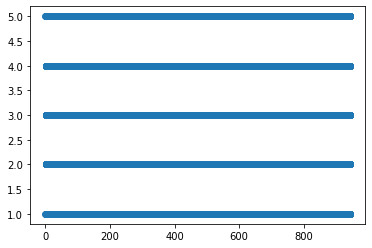

In [208]:
from matplotlib import pyplot as plt
plt.scatter(X,y)

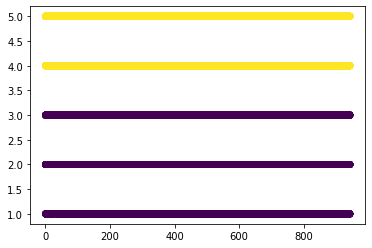

In [211]:
from sklearn.cluster import KMeans
KMcluster = KMeans(n_clusters=2)
KMcluster.fit(y)
label = KMcluster.predict(y)
plt.scatter(X,y,c=label)

In [214]:
KMcluster.fit(y)
label = KMcluster.predict(y)
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [216]:
Data_set['clus'] = label
Data_set

,user_id,item_id,rating,timestamp,title,genres,clus
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
...,...,...,...,...,...,...,...
51291,749,50,5,878846978,Star Wars (1977),"Action, Adventure, Fantasy",0
51292,886,50,5,876031501,Star Wars (1977),"Action, Adventure, Fantasy",0
51293,739,50,4,886958895,Star Wars (1977),"Action, Adventure, Fantasy",0
51294,903,50,5,891031329,Star Wars (1977),"Action, Adventure, Fantasy",0


In [240]:
gggy = Data_set.groupby('item_id')['user_id'].count()
h = pd.DataFrame(gggy)
h

,user_id
item_id,
1,452
2,131
3,90
4,209
5,86
...,...
1674,1
1675,1
1676,1


In [237]:
Q = gggy[['user_id']]
E = gggy[['item_id']]

KeyError: ignored

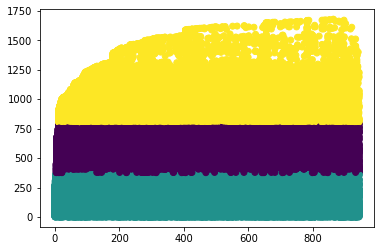

In [220]:
from sklearn.cluster import KMeans
KMcluster = KMeans(n_clusters=3)
KMcluster.fit(E)
label = KMcluster.predict(E)
plt.scatter(Q,E,c=label)